# Plant Leaf Classification

Applying machine learning models for classification of plant leaf images

### Importing necessary libraries

In [61]:
import numpy as np
import pandas as pd
import os
import string

### Reading the dataset

In [62]:
dataset = pd.read_csv("leaf_features1.csv")

In [63]:
dataset.head(5)

,Unnamed: 0,area,perimeter,physiological_length,physiological_width,aspect_ratio,rectangularity,circularity,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,inverse_difference_moments,entropy
0,0,232549.0,3144.089858,1180,841,1.403092,4.267402,42.508465,8.865354,11.580899,8.398964,27.800215,32.902279,27.403357,25.910622,0.996379,0.897422,1.931667
1,0,474562.5,3473.489792,1219,909,1.341034,2.334932,25.423693,23.752019,30.081827,16.240280,43.429020,53.242972,33.112202,19.731937,0.997756,0.822875,3.369693
2,0,419871.0,3987.515395,1411,1160,1.216379,3.898245,37.869439,17.470908,23.944648,13.222306,36.482656,46.329772,31.868380,22.333380,0.997727,0.846861,3.018129
3,0,435572.0,3009.041968,985,807,1.220570,1.824945,20.787226,19.343993,25.105472,14.664246,37.988880,47.365957,31.541931,20.139154,0.997820,0.840751,3.097287
4,0,238858.5,4008.541857,1494,1154,1.294627,7.217981,67.271660,11.221184,14.514543,8.780794,32.630938,39.284535,29.519376,23.323631,0.996223,0.893048,2.002692


In [64]:
type(dataset)

pandas.core.frame.DataFrame

In [65]:
maindir = r'D:\Leaves'
img_files = os.listdir(maindir)

### Creating target labels

Breakpoints are used alongside the image file to create a vector of target labels. The breakpoints are solely made by us.

In [66]:
breakpoints = ['AG-S-001','AG-S-050','AH-S-001','AH-S-056','AI-S-004','AI-S-063','AV-S-001','AV-S-123','BA-S-001','BA-S-103','BJ-S-001','BJ-S-034','CC-S-001','CC-S-075','CL-S-001','CL-S-057','FA-S-001','FA-S-050','FR-S-001','FR-S-063','HR-S-001','HR-S-043','J-S-001','J-S-071','MC-S-001','MC-S-057','MI-S-001','MI-S-062','MK-S-001','MK-S-060','MO-S-001','MO-S-077','M-S-001','M-S-098','NA-S-001','NA-S-040','NO-S-001','NO-S-062','OT-S-001','OT-S-052','PA-S-001','PA-S-048','PB-S-001','PB-S-048','PG-S-001','PG-S-080','PP-S-001','PP-S-061','SA-S-001','SA-S-058','SC-S-001','SC-S-039','SJ-S-001','SJ-S-056','TD-S-001','TD-S-056','TF-S-001','TF-S-036']

In [67]:
target_list = []
for file in img_files:
    target_num = str(file.split(".")[0])
    flag = 0
    i = 0 
    for i in range(0,len(breakpoints),2):
        if((target_num >= breakpoints[i]) and (target_num <= breakpoints[i+1])):
            flag = 1
            break
    if(flag==1):
        target = int((i/2))
        target_list.append(target)

In [68]:
y = np.array(target_list)
y

array([ 0,  0,  0, ..., 28, 28, 28])

In [69]:
X = dataset.iloc[:,1:]

In [70]:
X.head(5)

,area,perimeter,physiological_length,physiological_width,aspect_ratio,rectangularity,circularity,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,inverse_difference_moments,entropy
0,232549.0,3144.089858,1180,841,1.403092,4.267402,42.508465,8.865354,11.580899,8.398964,27.800215,32.902279,27.403357,25.910622,0.996379,0.897422,1.931667
1,474562.5,3473.489792,1219,909,1.341034,2.334932,25.423693,23.752019,30.081827,16.240280,43.429020,53.242972,33.112202,19.731937,0.997756,0.822875,3.369693
2,419871.0,3987.515395,1411,1160,1.216379,3.898245,37.869439,17.470908,23.944648,13.222306,36.482656,46.329772,31.868380,22.333380,0.997727,0.846861,3.018129
3,435572.0,3009.041968,985,807,1.220570,1.824945,20.787226,19.343993,25.105472,14.664246,37.988880,47.365957,31.541931,20.139154,0.997820,0.840751,3.097287
4,238858.5,4008.541857,1494,1154,1.294627,7.217981,67.271660,11.221184,14.514543,8.780794,32.630938,39.284535,29.519376,23.323631,0.996223,0.893048,2.002692


In [71]:
y[0:5]

array([0, 0, 0, 0, 0])

### Train test split

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 150)

In [74]:
X_train.head(5)

,area,perimeter,physiological_length,physiological_width,aspect_ratio,rectangularity,circularity,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,inverse_difference_moments,entropy
1336,707863.5,3540.592382,950,1131,0.839965,1.517877,17.709339,41.725172,53.693893,23.598975,57.686887,71.332926,40.033748,6.632635,0.999229,0.777151,4.716627
1578,793838.0,3573.129402,1267,914,1.386214,1.458784,16.082946,34.653180,43.114845,27.035207,44.514394,52.905487,36.756363,61.573990,0.995469,0.655099,5.684861
316,967797.5,3903.999457,1208,1111,1.087309,1.386745,15.748348,48.869164,69.079396,35.262064,51.528744,69.669049,41.826246,12.055270,0.998847,0.664963,6.235633
1016,273020.5,2371.250112,580,926,0.626350,1.967178,20.594890,13.069031,18.020537,13.916281,34.265194,44.560523,35.560063,6.354908,0.998917,0.902751,2.126901
1202,442217.0,3571.732432,1449,707,2.049505,2.316607,28.848444,18.722153,21.992918,15.201116,36.983025,42.026400,33.054283,40.727723,0.996266,0.797570,3.531231


In [75]:
y_train[0:5]

array([21, 25,  4, 14, 18])

### Feature Scaling

In [76]:
from sklearn.preprocessing import StandardScaler

In [77]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [78]:
X_train[0:2]

array([[ 4.31944347e-01,  2.35169279e-01, -4.88652461e-01,
         1.01665660e+00, -7.73837459e-01, -3.22874685e-01,
        -3.57132940e-01,  1.12686961e+00,  1.30440561e+00,
         6.22215326e-01,  1.68967395e+00,  1.94802863e+00,
         1.07101673e+00, -1.12937428e+00,  1.18639186e+00,
         3.35031006e-01,  1.67282021e-01],
       [ 8.43182346e-01,  2.81920039e-01,  5.17502924e-01,
         1.87469891e-03,  1.79215322e-01, -3.95743534e-01,
        -5.61501569e-01,  4.90722836e-01,  5.22136242e-01,
         1.01942093e+00,  1.15976900e-01,  1.31029220e-01,
         5.72074371e-01,  7.71875245e-01, -5.49276635e-01,
        -1.19253976e+00,  9.42401101e-01]])

In [79]:
y_train[0:2]

array([21, 25])

## Applying Random Forest Model

In [80]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
model=RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [82]:
y_pred=model.predict(X_test)

In [83]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.8587570621468926

In [84]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import numpy as np
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.86      1.00      0.92         6
           2       1.00      1.00      1.00         2
           3       0.87      0.81      0.84        16
           4       0.87      0.93      0.90        14
           5       0.75      1.00      0.86         3
           6       1.00      0.88      0.93         8
           7       0.33      0.33      0.33         3
           8       1.00      1.00      1.00         3
           9       1.00      0.50      0.67         6
          10       0.40      1.00      0.57         2
          11       1.00      1.00      1.00         7
          12       0.86      0.86      0.86         7
          13       1.00      0.80      0.89        10
          14       0.67      0.50      0.57         4
          15       1.00      0.92      0.96        12
          16       1.00      0.93      0.96        14
          17       0.00    

C:\Users\Ayush\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## SVM

In [85]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train,y_train)
y2 = clf.predict(X_test)
from sklearn import metrics
metrics.accuracy_score(y_test, y2)

0.8587570621468926

In [86]:
 print(classification_report(y_test, y2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      0.86      0.92         7
           2       0.50      1.00      0.67         2
           3       0.78      0.93      0.85        15
           4       0.88      0.93      0.90        15
           5       1.00      1.00      1.00         4
           6       0.78      1.00      0.88         7
           7       0.00      0.00      0.00         3
           8       1.00      0.67      0.80         3
           9       0.50      0.67      0.57         3
          10       1.00      0.60      0.75         5
          11       0.88      1.00      0.93         7
          12       0.88      1.00      0.93         7
          13       0.89      1.00      0.94         8
          14       0.50      0.67      0.57         3
          15       0.92      1.00      0.96        11
          16       1.00      1.00      1.00        13
          17       1.00    

C:\Users\Ayush\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Testing with mobile captured leaves which are not classified

In [87]:
import os
import cv2

In [98]:
def bg_sub(filename):
    test_img_path = 'D:\Segmented Medicinal Leaf Images\standardleaves\\' + filename
    main_img = cv2.imread(test_img_path)
    img = cv2.cvtColor(main_img, cv2.COLOR_BGR2RGB)
    resized_image = cv2.resize(img, (1600, 1200))
    size_y,size_x,_ = img.shape
    gs = cv2.cvtColor(resized_image,cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gs, (55,55),0)
    ret_otsu,im_bw_otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    kernel = np.ones((50,50),np.uint8)
    closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)
    
    contours, hierarchy = cv2.findContours(closing,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    
    contains = []
    y_ri,x_ri, _ = resized_image.shape
    for cc in contours:
        yn = cv2.pointPolygonTest(cc,(x_ri//2,y_ri//2),False)
        contains.append(yn)

    val = [contains.index(temp) for temp in contains if temp>0]
    index = val[0]
    
    black_img = np.empty([1200,1600,3],dtype=np.uint8)
    black_img.fill(0)
    
    cnt = contours[index]
    mask = cv2.drawContours(black_img, [cnt] , 0, (255,255,255), -1)
    
    maskedImg = cv2.bitwise_and(resized_image, mask)
    white_pix = [255,255,255]
    black_pix = [0,0,0]
    
    final_img = maskedImg
    h,w,channels = final_img.shape
    for x in range(0,w):
        for y in range(0,h):
            channels_xy = final_img[y,x]
            if all(channels_xy == black_pix):
                final_img[y,x] = white_pix
    
    return final_img

In [108]:
filename = 'J.jpg' 
bg_rem_img = bg_sub(filename)
type(filename)

str

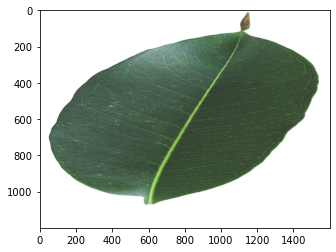

In [109]:
import matplotlib.pyplot as plt
plt.imshow(bg_rem_img)

In [110]:
import mahotas as mt

In [111]:
def feature_extract(img):
        names = ['area','perimeter','physiological_length','physiological_width','aspect_ratio','rectangularity','circularity', \
             'mean_r','mean_g','mean_b','stddev_r','stddev_g','stddev_b', \
             'contrast','correlation','inverse_difference_moments','entropy'
                ]
        df = pd.DataFrame([], columns=names)

        

        #Preprocessing
        gs = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
        blur = cv2.GaussianBlur(gs, (25,25),0)
        ret_otsu,im_bw_otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
        kernel = np.ones((50,50),np.uint8)
        closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)

        #Shape features
        contours, image = cv2.findContours(closing,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
        cnt = contours[0]
        M = cv2.moments(cnt)
        area = cv2.contourArea(cnt)
        perimeter = cv2.arcLength(cnt,True)
        x,y,w,h = cv2.boundingRect(cnt)
        aspect_ratio = float(w)/h
        rectangularity = w*h/area
        circularity = ((perimeter)**2)/area

        #Color features
        red_channel = img[:,:,0]
        green_channel = img[:,:,1]
        blue_channel = img[:,:,2]
        blue_channel[blue_channel == 255] = 0
        green_channel[green_channel == 255] = 0
        red_channel[red_channel == 255] = 0

        red_mean = np.mean(red_channel)
        green_mean = np.mean(green_channel)
        blue_mean = np.mean(blue_channel)

        red_std = np.std(red_channel)
        green_std = np.std(green_channel)
        blue_std = np.std(blue_channel)

        #Texture features
        textures = mt.features.haralick(gs)
        ht_mean = textures.mean(axis=0)
        contrast = ht_mean[1]
        correlation = ht_mean[2]
        inverse_diff_moments = ht_mean[4]
        entropy = ht_mean[8]

        vector = [area,perimeter,w,h,aspect_ratio,rectangularity,circularity,\
                  red_mean,green_mean,blue_mean,red_std,green_std,blue_std,\
                  contrast,correlation,inverse_diff_moments,entropy
                 ]

        df_temp = pd.DataFrame([vector],columns=names)
        df = df.append(df_temp)

        return df

In [112]:
features_of_img = feature_extract(bg_rem_img)
features_of_img

,area,perimeter,physiological_length,physiological_width,aspect_ratio,rectangularity,circularity,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,inverse_difference_moments,entropy
0,972695.5,4251.136543,1489,1068,1.394195,1.634892,18.579465,35.440147,47.791309,35.846433,37.469037,49.871581,38.34204,50.155286,0.996689,0.634467,6.276362


In [113]:
scaled_features = sc_X.transform(features_of_img)
print(scaled_features)
y_pred_mobile = clf.predict(scaled_features)
y_pred_mobile[0]

[[ 1.69870346  1.25611342  1.22212909  0.7220425   0.19313873 -0.17858304
  -0.24779494  0.56151284  0.8679381   2.03794007 -0.72572081 -0.16812277
   0.81347462  0.37673016  0.01418947 -1.45076533  1.41592802]]


1

In [114]:
common_names = ['Rasna','Arive-Dantu','Jackfruit', \
                'Neem','Basale','Indian Mustard','Karanda',' Lemon', \
                'Roxburgh fig','Peepal Tree','Hibiscus Rosa-sinensis','Jasmine', \
                'Mango','Mint','Drumstick','Jamaica Cherry-Gasagase','Curry','Oleander', 'Parijata', \
                'Tulsi', 'Betel','Mexican Mint','Indian Beech','Pomegranate','Sandalwood',\
                'Jamun','Rose Apple','Crape Jasmine','Fenugreek'
               ]

In [115]:
common_names[y_pred_mobile[0]]

'Arive-Dantu'